In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)


In [3]:
df[ 'target']=load_breast_cancer().target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1----Malignant(no cancer)

0---Benign(cancer)

<AxesSubplot:xlabel='target', ylabel='count'>

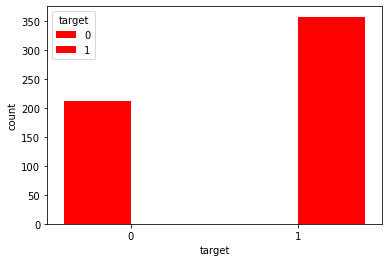

In [5]:
sns.countplot(x=df['target'],hue=df['target'],facecolor=(1, 0, 0, 1),linewidth=0,edgecolor=sns.color_palette('viridis', 3))

In [6]:
df[df['target']==1].mean()

mean radius                 12.146524
mean texture                17.914762
mean perimeter              78.075406
mean area                  462.790196
mean smoothness              0.092478
mean compactness             0.080085
mean concavity               0.046058
mean concave points          0.025717
mean symmetry                0.174186
mean fractal dimension       0.062867
radius error                 0.284082
texture error                1.220380
perimeter error              2.000321
area error                  21.135148
smoothness error             0.007196
compactness error            0.021438
concavity error              0.025997
concave points error         0.009858
symmetry error               0.020584
fractal dimension error      0.003636
worst radius                13.379801
worst texture               23.515070
worst perimeter             87.005938
worst area                 558.899440
worst smoothness             0.124959
worst compactness            0.182673
worst concav

In [7]:
df[df['target']==0].mean()

mean radius                  17.462830
mean texture                 21.604906
mean perimeter              115.365377
mean area                   978.376415
mean smoothness               0.102898
mean compactness              0.145188
mean concavity                0.160775
mean concave points           0.087990
mean symmetry                 0.192909
mean fractal dimension        0.062680
radius error                  0.609083
texture error                 1.210915
perimeter error               4.323929
area error                   72.672406
smoothness error              0.006780
compactness error             0.032281
concavity error               0.041824
concave points error          0.015060
symmetry error                0.020472
fractal dimension error       0.004062
worst radius                 21.134811
worst texture                29.318208
worst perimeter             141.370330
worst area                 1422.286321
worst smoothness              0.144845
worst compactness        

In [8]:
y=df['target']
sss=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(df,y):
    strat_train=df.loc[train_index]
    strat_test=df.loc[test_index]

In [9]:
x_train=strat_train.drop(columns=['target'])
y_train=strat_train['target']


In [10]:
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
prediction_log=model_log.predict(x_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
confusion_matrix_log=confusion_matrix(y_train,prediction_log,labels=[1,0])

In [12]:
confusion_matrix_log

array([[277,   8],
       [ 12, 158]], dtype=int64)

In [13]:
y_train[y_train==0].shape

(170,)

In [14]:
accuracy_score(y_train,prediction_log)

0.9560439560439561

In [15]:
report=classification_report(y_train,prediction_log)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       170
           1       0.96      0.97      0.97       285

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



In [16]:
model_forest=RandomForestClassifier()
model_forest.fit(x_train,y_train)
prediction_forest=model_forest.predict(x_train)
accuracy_score(y_train,prediction_forest)

1.0

In [17]:
confusion_matrix_froest=confusion_matrix(y_train,prediction_forest,labels=[1,0])

In [18]:
confusion_matrix_froest

array([[285,   0],
       [  0, 170]], dtype=int64)

In [19]:
model_decision=DecisionTreeClassifier()
model_decision.fit(x_train,y_train)
prediction_decision=model_decision.predict(x_train)
accuracy_score(y_train,prediction_decision)

1.0

In [20]:
confusion_matrix_decision=confusion_matrix(y_train,prediction_decision,labels=[1,0])
confusion_matrix_decision

array([[285,   0],
       [  0, 170]], dtype=int64)

In [21]:
accuracy_score(y_train,prediction_decision)

1.0

In [22]:
report=classification_report(y_train,prediction_forest)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [23]:
report=classification_report(y_train,prediction_decision)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [24]:
input_value=(x_train.loc[418])
input_arr=np.asarray(input_value)
reshape_input=input_arr.reshape(1,-1)
predictions=model_log.predict(reshape_input)
if predictions==0:
    print("there's cancer") 
else:
    print("there's no cancer")

there's no cancer


In [25]:
x_test=strat_test.drop(columns=['target'])
y_test=strat_test['target']

In [26]:
model_log=LogisticRegression()
model_log.fit(x_test,y_test)
prediction_log_test=model_log.predict(x_test)
confusion_matrix_log_test=confusion_matrix(y_test,prediction_log_test,labels=[1,0])
confusion_matrix_log_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[70,  2],
       [ 2, 40]], dtype=int64)

In [27]:
report_test_log=classification_report(y_test,prediction_log_test)
print(report_test_log)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [28]:
model_forest=RandomForestClassifier()
model_forest.fit(x_test,y_test)
prediction_forest_test=model_forest.predict(x_test)
accuracy_score(y_test,prediction_forest_test)

1.0

In [29]:
confusion_matrix_log_test=confusion_matrix(y_test,prediction_forest_test,labels=[1,0])
confusion_matrix_log_test

array([[72,  0],
       [ 0, 42]], dtype=int64)

In [30]:
np.arange(len(df.target))[0]

0